## **Time-Series Forecasting Harga Emas Pegadaian Berdasarkan Nilai Tukar Rupiah**

Dalam konteks ketidakpastian ekonomi dan volatilitas nilai tukar, emas kerap dipandang sebagai instrumen lindung nilai (hedging) yang aman.

Exercise ini bertujuan untuk mengkaji hubungan antara harga emas di Pegadaian dengan nilai tukar USD/IDR, serta membangun model prediksi harga emas menggunakan pendekatan time-series seperti ARIMA dan Prophet. Dengan memanfaatkan data historis harian, peserta akan mengevaluasi keakuratan model prediksi, serta menyimulasikan strategi investasi antara menyimpan emas batangan atau menahan nilai dalam bentuk dolar AS.

Exercise ini juga memperkenalkan strategi teknikal sederhana seperti moving average crossover, dan mengajak peserta menganalisis performa investasi berdasarkan data aktual. Kegiatan ini memberikan wawasan praktis dan analitis dalam pengambilan keputusan keuangan berbasis data, dengan pendekatan yang menggabungkan teori ekonomi, statistik, dan strategi investasi.

Landasan Teori:

1. Purchasing Power Parity (PPP) Theory. PPP menyatakan bahwa dalam jangka panjang, nilai tukar antar mata uang mencerminkan perbedaan tingkat harga barang antar negara. Jika nilai tukar USD/IDR melemah (IDR terdepresiasi), harga emas dalam IDR cenderung naik karena emas diperdagangkan dalam USD di pasar global.

2. Safe Haven Theory. Dalam kondisi ketidakpastian ekonomi atau pelemahan mata uang, investor mencari aset lindung nilai (safe haven) seperti emas. Kenaikan permintaan emas terjadi ketika Rupiah melemah atau pasar sedang volatil. Ini menjelaskan mengapa emas dan USD sama-sama digunakan untuk hedging.

3. Efficient Market Hypothesis (EMH). Harga aset sudah mencerminkan semua informasi yang tersedia. Oleh karena itu, sulit untuk mengalahkan pasar secara konsisten. Menantang asumsi bahwa strategi moving average dapat secara konsisten mengungguli buy & hold.

4. Time-Series Forecasting Theory. Berdasarkan Box-Jenkins Methodology, ARIMA menangkap pola autocorrelation dan tren dalam data waktu. Dikembangkan oleh Facebook, Prophet menggunakan model aditif yang fleksibel untuk komponen tren, musiman, dan libur.

5. Capital Allocation and Risk-Return Tradeoff. Investor akan mengalokasikan modal berdasarkan ekspektasi return dan risiko (volatilitas). Simulasi emas vs USD menunjukkan tradeoff antara return yang lebih tinggi vs risiko yang lebih rendah.

6. Technical Analysis Theory. Pola historis harga dan volume bisa memberikan sinyal untuk keputusan beli/jual. Moving Average Crossover adalah salah satu strategi klasik dalam analisis teknikal.

Pertanyaan Penelitian:

- RQ1: Apakah terdapat hubungan jangka pendek antara nilai tukar USD/IDR dengan harga emas Pegadaian dalam IDR?

- RQ2: Sejauh mana nilai tukar USD/IDR dapat memprediksi pergerakan harga emas batangan di Indonesia?

- RQ3: Model manakah yang memberikan hasil prediksi lebih akurat untuk harga emas: Prophet atau ARIMA dengan exogenous variable (USD/IDR)?

- RQ4: Strategi investasi seperti apa yang lebih optimal dalam kondisi fluktuasi kurs: investasi dalam emas atau simpanan dalam bentuk USD?

- RQ5: Apakah strategi moving average crossover lebih unggul dibandingkan strategi buy & hold dalam investasi emas di Indonesia?

Catatan:

- Pastikan kamu upload file CSV dummy_gold_usd_idr.csv di awal Colab session.

- Kamu bisa ganti dengan data real dari Pegadaian dan BI untuk eksperimen lebih akurat.

- Untuk optimasi ARIMA atau strategi lainnya, bisa ditambahkan grid search atau evaluasi MAPE/RMSE.


In [4]:
# Step 1: Install Dependencies
!pip install prophet pandas matplotlib

# Step 2: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

In [5]:
# Step 3: Give access to My Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Link the file path as per your Google Drive file structure
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dummy_Gold_Price_USD-IDR_Dataset.csv')
df.rename(columns={'date': 'ds', 'gold_price': 'y'}, inplace=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


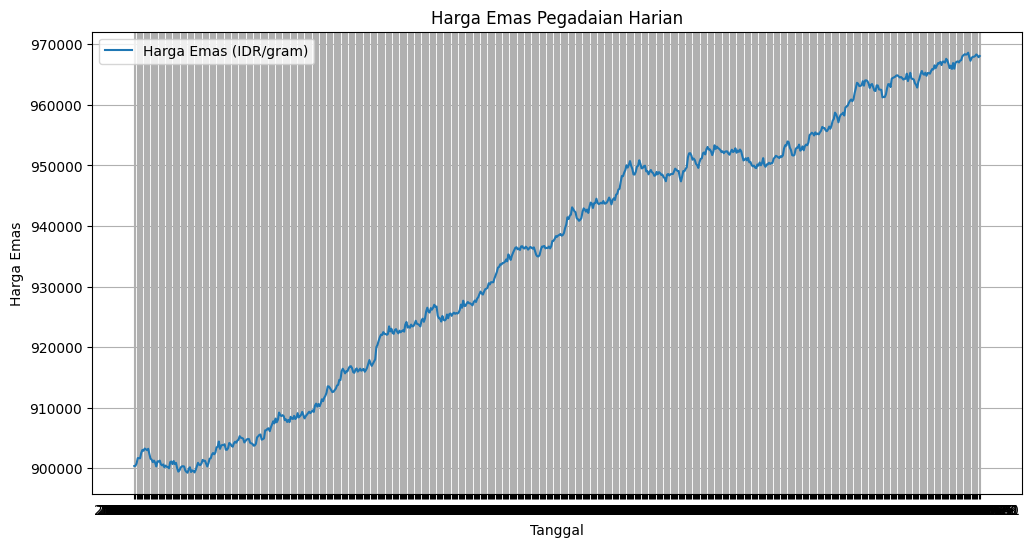

In [6]:
# Step 4: Visualisasi Data
plt.figure(figsize=(12,6))
plt.plot(df['ds'], df['y'], label='Harga Emas (IDR/gram)')
plt.title('Harga Emas Pegadaian Harian')
plt.xlabel('Tanggal')
plt.ylabel('Harga Emas')
plt.grid(True)
plt.legend()
plt.show()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpefv5ovpd/7f8uz8av.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpefv5ovpd/8v6y76mp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6547', 'data', 'file=/tmp/tmpefv5ovpd/7f8uz8av.json', 'init=/tmp/tmpefv5ovpd/8v6y76mp.json', 'output', 'file=/tmp/tmpefv5ovpd/prophet_modellx5w0l_q/prophet_model-20250415145020.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:50:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:50:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


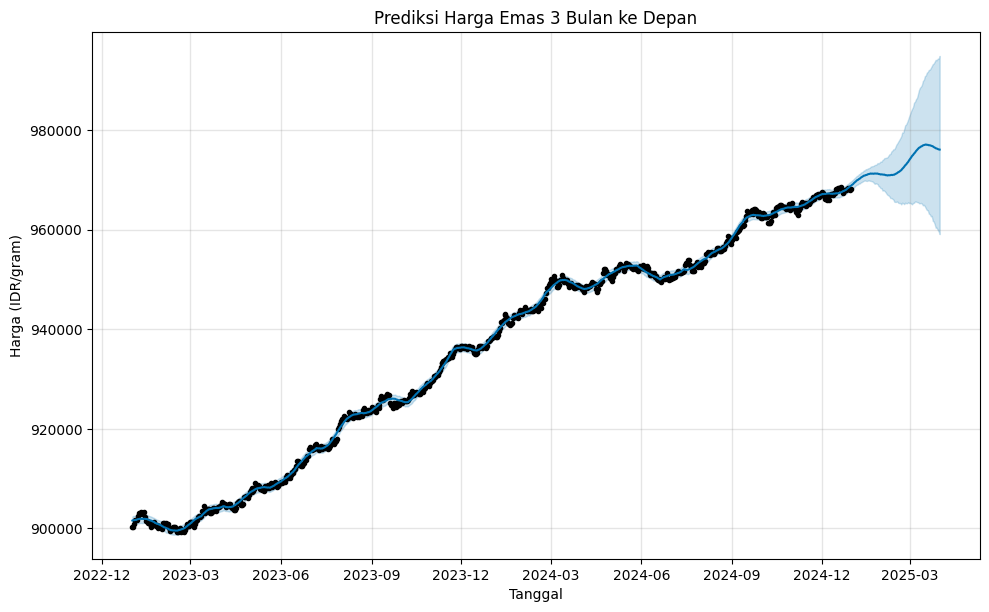

,ds,yhat,yhat_lower,yhat_upper
731,2025-01-01,968982.639383,968186.235374,969818.107631
732,2025-01-02,969105.539932,968302.733708,969974.133284
733,2025-01-03,969339.307844,968432.552131,970197.011016
734,2025-01-04,969500.385983,968684.819203,970371.539315
735,2025-01-05,969677.869011,968867.612340,970579.097367
...,...,...,...,...
816,2025-03-27,976312.094808,960353.858504,994072.120099
817,2025-03-28,976272.598362,960369.104703,993979.939215
818,2025-03-29,976166.988840,959930.166209,994289.404648
819,2025-03-30,976088.610826,959622.078462,994340.564861


In [7]:
# Step 5: Forecasting dengan Prophet
model = Prophet()
model.fit(df)

# Step 6: Buat prediksi 90 hari ke depan
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# Step 7: Plot hasil prediksi
model.plot(forecast)
plt.title("Prediksi Harga Emas 3 Bulan ke Depan")
plt.xlabel("Tanggal")
plt.ylabel("Harga (IDR/gram)")
plt.grid(True)
plt.show()

# Step 8: Tampilkan hasil prediksi
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(90)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


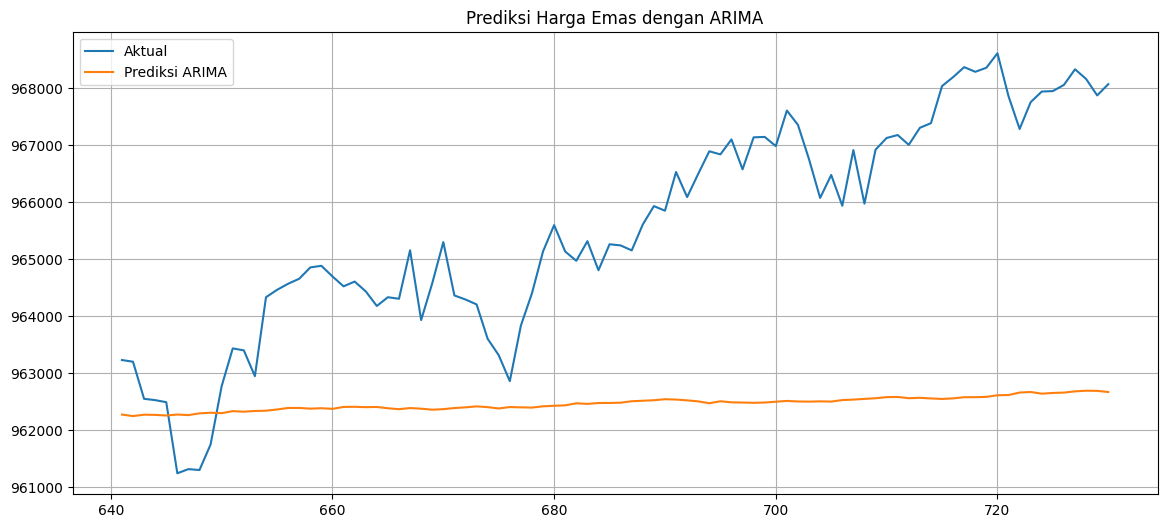

In [10]:
# Step 9: ARIMA Forecast with USD/IDR
from statsmodels.tsa.statespace.sarimax import SARIMAX

endog = df['y']
exog = df[['usd_idr']]
train_endog, test_endog = endog[:-90], endog[-90:]
train_exog, test_exog = exog[:-90], exog[-90:]

arima_model = SARIMAX(train_endog, exog=train_exog, order=(1,1,1), seasonal_order=(0,0,0,0))
arima_result = arima_model.fit(disp=False)
arima_forecast = arima_result.predict(start=len(train_endog), end=len(train_endog)+89, exog=test_exog)

forecast_df = pd.DataFrame({
    'date': df.index[-90:],
    'actual': test_endog.values,
    'predicted': arima_forecast.values
})
plt.figure(figsize=(14,6))
plt.plot(forecast_df['date'], forecast_df['actual'], label='Aktual')
plt.plot(forecast_df['date'], forecast_df['predicted'], label='Prediksi ARIMA')
plt.title('Prediksi Harga Emas dengan ARIMA')
plt.legend(); plt.grid(); plt.show()

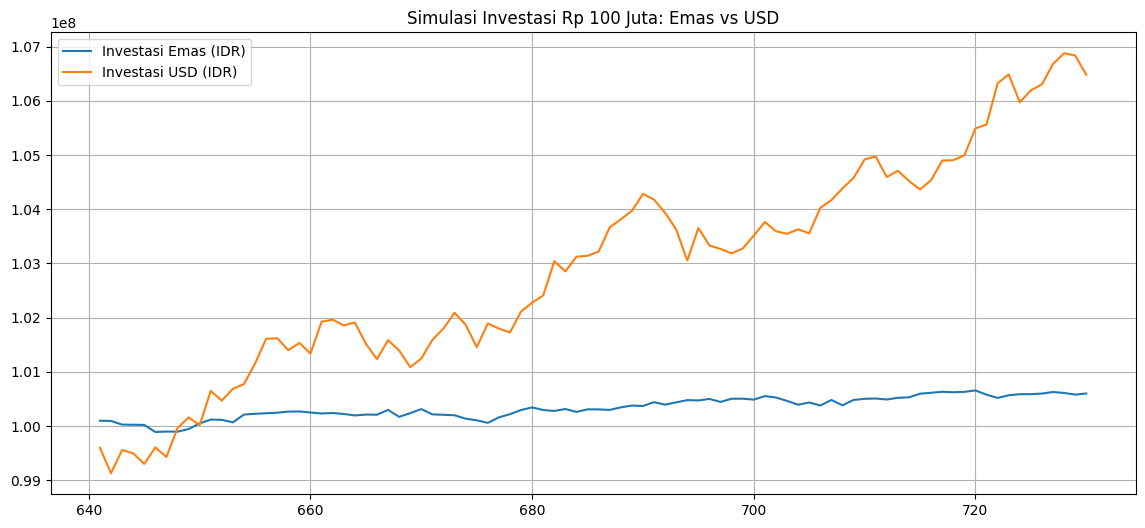

In [13]:
# Step 10: Simulasi Investasi Emas vs USD
df['gold_return'] = df['y'].pct_change()
df['usd_return'] = df['usd_idr'].pct_change()

initial_investment = 100_000_000
gold_start_price = df['y'].iloc[-91]
usd_start_rate = df['usd_idr'].iloc[-91]
gold_units = initial_investment / gold_start_price
usd_units = initial_investment / usd_start_rate
df['gold_value'] = gold_units * df['y']
df['usd_value_in_idr'] = usd_units * df['usd_idr']

comp_df = df[['gold_value', 'usd_value_in_idr']].iloc[-90:].copy()
comp_df['date'] = comp_df.index
comp_df['gold_return_%'] = (comp_df['gold_value'] / initial_investment - 1) * 100
comp_df['usd_return_%'] = (comp_df['usd_value_in_idr'] / initial_investment - 1) * 100

plt.figure(figsize=(14,6))
plt.plot(comp_df['date'], comp_df['gold_value'], label='Investasi Emas (IDR)')
plt.plot(comp_df['date'], comp_df['usd_value_in_idr'], label='Investasi USD (IDR)')
plt.title('Simulasi Investasi Rp 100 Juta: Emas vs USD')
plt.legend(); plt.grid(); plt.show()

<ipython-input-14-3e6cba8a5a12>:23: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '100000795.6442958' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df.index[i], 'strategy_gold_value'] = gold_units * df['y'].iloc[i]


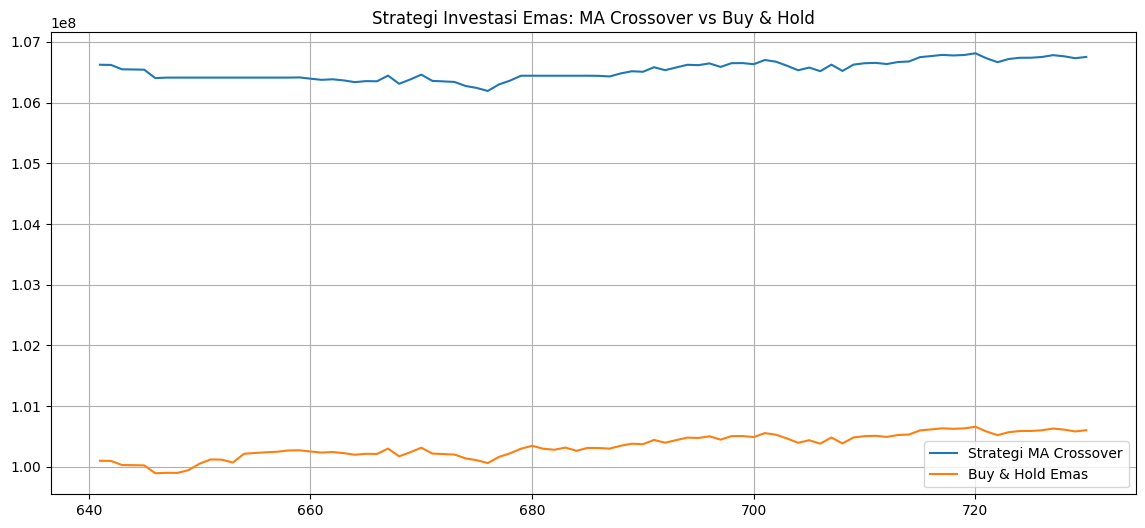

In [14]:
# Step 11: Strategi Moving Average Crossover
df['MA_short'] = df['y'].rolling(window=10).mean()
df['MA_long'] = df['y'].rolling(window=30).mean()
df['signal'] = 0
df.loc[df['MA_short'] > df['MA_long'], 'signal'] = 1
df.loc[df['MA_short'] < df['MA_long'], 'signal'] = -1

df['strategy_gold_value'] = initial_investment
holding = False
gold_units = 0

for i in range(1, len(df)):
    if df['signal'].iloc[i-1] == 1 and not holding:
        gold_units = df['strategy_gold_value'].iloc[i-1] / df['y'].iloc[i]
        df.loc[df.index[i], 'strategy_gold_value'] = gold_units * df['y'].iloc[i]
        holding = True
    elif df['signal'].iloc[i-1] == -1 and holding:
        df.loc[df.index[i], 'strategy_gold_value'] = gold_units * df['y'].iloc[i]
        gold_units = 0
        holding = False
    else:
        if holding:
            df.loc[df.index[i], 'strategy_gold_value'] = gold_units * df['y'].iloc[i]
        else:
            df.loc[df.index[i], 'strategy_gold_value'] = df['strategy_gold_value'].iloc[i-1]

strategy_df = df.iloc[-90:]
plt.figure(figsize=(14,6))
plt.plot(strategy_df.index, strategy_df['strategy_gold_value'], label='Strategi MA Crossover')
plt.plot(comp_df['date'], comp_df['gold_value'].values, label='Buy & Hold Emas')
plt.title('Strategi Investasi Emas: MA Crossover vs Buy & Hold')
plt.legend(); plt.grid(); plt.show()